<a href="https://colab.research.google.com/github/smomtahe/BrainTumorCassification/blob/main/CNN_BrainTumor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

# we should use image data generator (we should externally cretae labes -> array) since we have more than 2 classes (we have 4 classes)
import ipywidgets as widgets
import io #input output
from PIL import Image # public image library
#!pip install tqdm
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle # use shuffle : images into train and test


In [3]:
from google.colab import files
# Choose the file from your local machine
uploaded = files.upload()

Saving MRIBrainTumor.zip to MRIBrainTumor.zip


In [4]:
import os, io, zipfile
import io
zip_file_path = '/content/MRIBrainTumor.zip'

extracted_dir = '/content/extracted_data'

!mkdir -p $extracted_dir
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)
!ls $extracted_dir

Testing  Training


In [5]:
## List all files in the specified directory ('../content/extracted_data/Training/')
path=os.listdir('../content/extracted_data/Training/')

# Define a dictionary 'classes' to map class names to numerical labels
classes={'no_tumor':0,'pituitary_tumor':1}

In [6]:
import cv2

# Initialize empty lists to store images (X) and corresponding labels (Y)
X=[]
Y=[]
# cls no_tumor then p_tumor -> read img in 2 D and cretae a model cvm
# Loop over each class in the 'classes' dictionary
# 1st iteration the value is no tumor 2nd iteration it is tumor
for cls in classes:
  # Construct the full path for the current class
  pth='../content/extracted_data/Training/'+cls
  # Loop over each file (image) in the current class directory
  for j in os.listdir(pth): # read all of these images in a gray state #list dir : list of all inside the folder
    img=cv2.imread(pth+'/'+j,0)      # Read the image in grayscale (0 means grayscale) -> img = 2DNumpy array (grayscale values of img)
    img=cv2.resize(img,(200,200))  # Resize the image to 200x200 pixels (ML need the same dimensions)
    X.append(img) # Append the image to the 'X' list
    Y.append(classes[cls])          # Append the corresponding label (numerical) to the 'Y' list

# the 'X' list will contain the resized grayscale images,
# the 'Y' list will contain corresponding numerical labels indicating the class of each image.

In [7]:
np.unique(Y) # 2 classes 0 and 1
# conver to arryay
X=np.array(X)
Y=np.array(Y)
#Y.shape
pd.Series(Y)
X.shape #1222 samples

(1222, 200, 200)

In [8]:
pd.Series(Y).value_counts()  # o positive tumor

1    827
0    395
dtype: int64

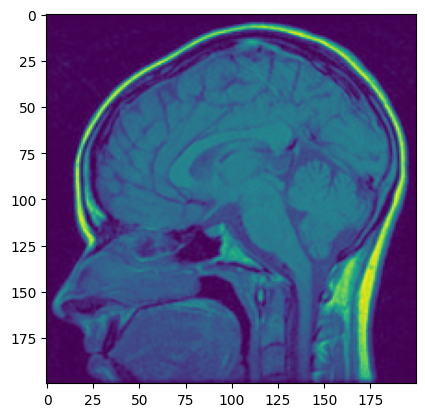

In [9]:
plt.imshow(X[200]) #imshow

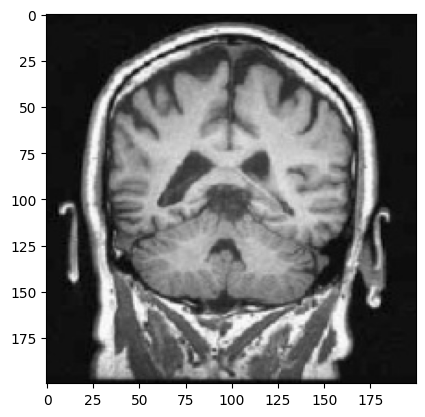

In [10]:
plt.imshow(X[0],cmap='gray')

In [11]:
# prepare data
# X 2D array (1222, 200, 200): a 3D array representing images (num_images, height, width)

X_updated=X.reshape(len(X), 200, 200, 1) # Reshape X

#len : num of images #-1: size of the second dimension should be inferred
# to maintain the total number of elements: it flattens the array while keeping the number of elements unchanged.
X_updated.shape  #200*200=4000

(1222, 200, 200, 1)

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(X_updated,Y,random_state=10,test_size=0.2)
xtrain.shape, xtest.shape,

((977, 200, 200, 1), (245, 200, 200, 1))

In [13]:
#feature scaling # all features in same scale (RGB: 0 to 255 so samples/255)
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [14]:
#feature selection : PCA
#we want sensetive infor - delete some features - do not recommend PCA in this model
from sklearn.decomposition import PCA #not used
pca=PCA(.98)
#pca_train=pca.fit_transform(xtrain)
#pca_test=pca.transform(xtest)


In [15]:
print(xtrain.shape,xtest.shape)
pca=PCA(.98)
pca_train=xtrain #copy of it
pca_test=xtest

(977, 200, 200, 1) (245, 200, 200, 1)


In [16]:
# Train Model
# Convolutonal Neural Network  # VGG (shorten)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,1)))  # add 1st layer: 32 parameters to be trained, matrix for padding 3*3 - 3 RGB
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())  # to output
model.add(Dense(512,activation='relu'))   # for processing
model.add(Dropout(0.3))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
# more than 2 categorical_crossentropy for softmax

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 98, 98, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 dropout_1 (Dropout)         (None, 96, 96, 64)        0         
                                                        

In [18]:
# One-hot encode the labels # no tumor 0 tumor 1 (0 index of 1st label) -> conver label index to categorical encoding or one-hot encoding
from tensorflow.keras.utils import to_categorical
ytrain_one_hot = to_categorical(ytrain, num_classes=2)
ytest_one_hot = to_categorical(ytest, num_classes=2)

In [60]:
# Train Model
history = model.fit(pca_train, ytrain_one_hot, epochs=7, validation_split=0.1)


Epoch 1/7
28/28 [==============================] - 5s 174ms/step - loss: 0.0585 - accuracy: 0.9807 - val_loss: 0.0384 - val_accuracy: 1.0000
Epoch 2/7
28/28 [==============================] - 4s 160ms/step - loss: 0.0165 - accuracy: 0.9966 - val_loss: 0.0266 - val_accuracy: 0.9898
Epoch 3/7
28/28 [==============================] - 4s 157ms/step - loss: 0.0296 - accuracy: 0.9898 - val_loss: 0.1177 - val_accuracy: 0.9796
Epoch 4/7
28/28 [==============================] - 4s 158ms/step - loss: 0.0148 - accuracy: 0.9966 - val_loss: 0.0401 - val_accuracy: 0.9898
Epoch 5/7
28/28 [==============================] - 4s 159ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 6/7
28/28 [==============================] - 4s 159ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 7/7
28/28 [==============================] - 4s 159ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000


In [61]:
#plot
import matplotlib.pyplot as plt
import seaborn as sns

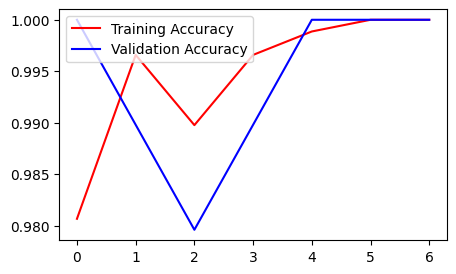

In [62]:
# accuracy
model.save('braintumor.h5') #save model
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs = range(len(acc))

fig=plt.figure(figsize=(5,3))
plt.plot(epochs, acc,'red',label="Training Accuracy")
plt.plot(epochs, val_acc,'blue',label="Validation Accuracy")
plt.legend(loc="upper left")
plt.show()

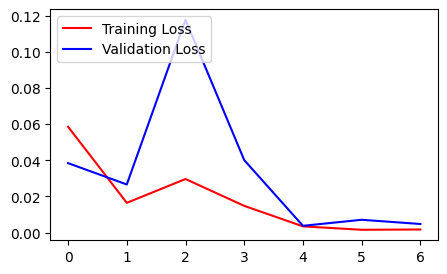

In [63]:
# loss
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(len(loss))

fig=plt.figure(figsize=(5,3))
plt.plot(epochs, loss,'red',label="Training Loss")
plt.plot(epochs, val_loss,'blue',label="Validation Loss")
plt.legend(loc="upper left")
plt.show()

In [ ]:
img=cv2.imread("")


1/1 [==============================] - 0s 18ms/step


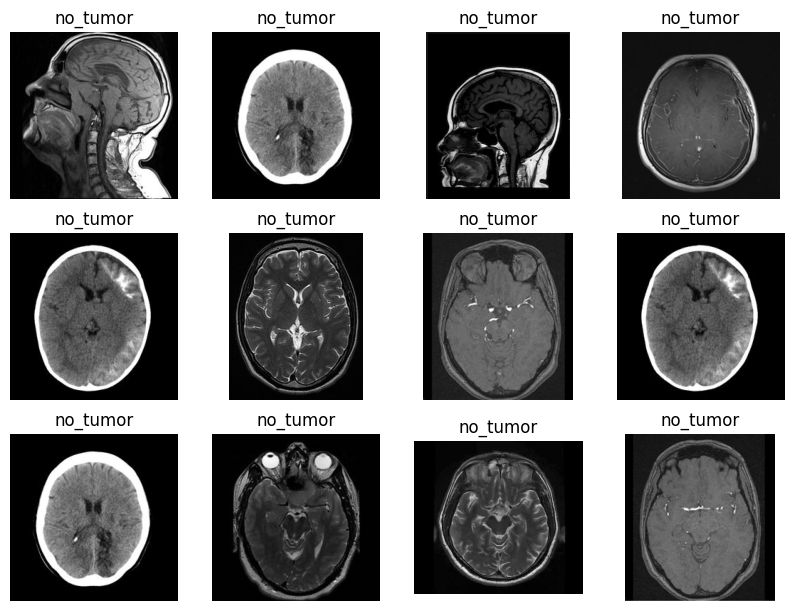

In [80]:
import matplotlib.pyplot as plt
import cv2
import os

# Assuming you have a dictionary 'dec' defined
dec = {0: 'no_tumor', 1: 'tumor'}

plt.figure(figsize=(10, 10))
p = os.listdir('../content/extracted_data/Testing/')  # no tumor
c = 1

for i in os.listdir('../content/extracted_data/Testing/no_tumor/')[:12]:
    plt.subplot(4, 4, c)
    img = cv2.imread('../content/extracted_data/Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, 200, 200, 1) / 255  # reshape to 4D and perform feature scaling
    p = model.predict(img1)
    plt.title(dec[np.argmax(p)])  # Use np.argmax to get the predicted class index
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

plt.show()


1/1 [==============================] - 0s 17ms/step


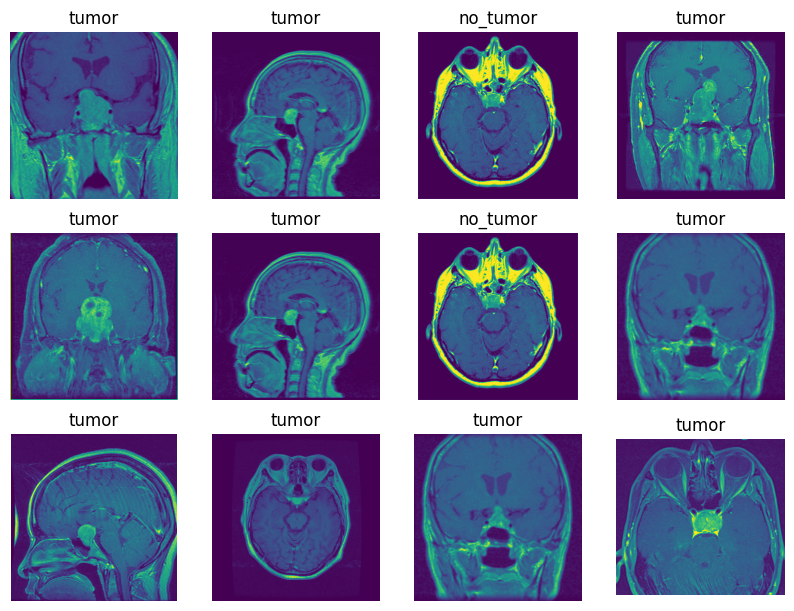

In [84]:
plt.figure(figsize=(10, 10))
p = os.listdir('../content/extracted_data/Testing/')  # no tumor
c = 1

for i in os.listdir('../content/extracted_data/Testing/pituitary_tumor/')[5:17]:
    plt.subplot(4, 4, c)
    img = cv2.imread('../content/extracted_data/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, 200, 200, 1) / 255  # reshape to 4D and perform feature scaling
    p = model.predict(img1)
    plt.title(dec[np.argmax(p)])  # Use np.argmax to get the predicted class index
    plt.imshow(img)
    plt.axis('off')
    c += 1
plt.show()

# some misclassified!